# 🎮 Video Game Sales Prediction

## 📌 Overview  
This project aims to predict global video game sales based on various features such as platform, genre, publisher, and other relevant attributes. We use regression models to analyze historical data and generate predictions.

## 📊 Dataset  

#### Original Dataset - https://www.kaggle.com/datasets/xtyscut/video-games-sales-as-at-22-dec-2016csv/code

The dataset contains information about video game sales, including:
- **Platform** (e.g., PS4, Xbox, PC)
- **Genre** (e.g., Action, Sports, RPG)
- **Publisher** (e.g., Nintendo, Ubisoft)
- **Sales in Different Regions** (e.g., North America, Europe)
- **Global Sales** (Target variable)

## ⚙️ Methodology  
1. **Data Preprocessing**: Cleaning, handling missing values, and encoding categorical variables.  
2. **Exploratory Data Analysis (EDA)**: Visualizing trends and distributions.  
3. **Modeling**: Applying regression models (Linear Regression, Naïve Bayes, etc.).  
4. **Evaluation**: Assessing model performance using metrics like MAE, MSE, and R².

## 🎯 Goal  
To build a reliable model that accurately predicts `Global_Sales` based on game features.

---


# 📚 Importing Basic Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv") 

### Size of Dataset

In [3]:
df.shape

(16719, 16)

### Basic Info About The Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### Calculating The Total Number Of Null Values in Each Column

In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

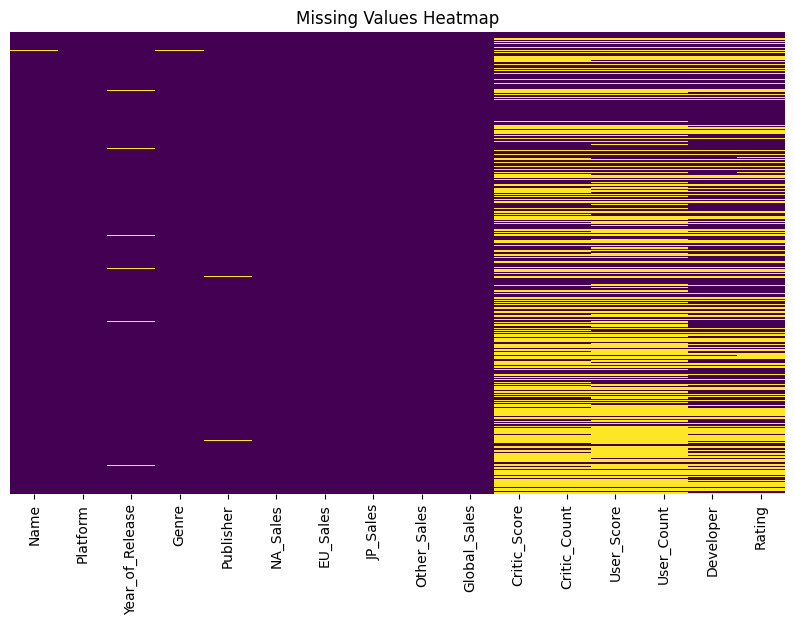

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


## Dropping Columns with Too Many Null Values

We dropped certain columns from the dataset because they contained too many missing values. Keeping these columns could negatively impact our model's accuracy and reliability.

### 🔹 Why Drop Columns with High Null Values?
- **Avoid bias** → Filling too many missing values with mean/median/mode may misrepresent actual data.
- **Improve model accuracy** → Unreliable data can mislead the model.
- **Feature importance** → If a column has too many missing values, it likely contributes little to no to predictions.

In [7]:
df_cleaned = df.drop(columns=["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"])

#### Droping Any Other NULL value containing rows

In [8]:
df_cleaned = df_cleaned.dropna()

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [10]:
    df_cleaned.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

### DATASET IS NOW CLEANED !!!

### Encoding Categorical Variables  

We use **One-Hot Encoding** to convert categorical columns into a numeric format. This is necessary because Linear Regression cannot work with text data. One-Hot Encoding creates separate binary columns for each category, preventing misleading ordinal relationships.


In [11]:

categorical_columns = ["Platform", "Genre", "Publisher"]


for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 50)


Unique values in Platform:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
--------------------------------------------------
Unique values in Genre:
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
--------------------------------------------------
Unique values in Publisher:
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 'Warner Bros. Interactive Entertainment' 'Universal Interactive'
 'Eidos Interactive' 'RedOctane' 'Vivendi Games' 'Enix Corporation'
 'Namco Bandai Games' 'Palco

In [12]:
df_encoded = pd.get_dummies(df_cleaned, columns=["Platform", "Genre", "Publisher"], drop_first=True)

In [13]:
df_encoded.head()

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,Wii Sports,2006.0,41.36,28.96,3.77,8.45,82.53,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Super Mario Bros.,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Mario Kart Wii,2008.0,15.68,12.76,3.79,3.29,35.52,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Wii Sports Resort,2009.0,15.61,10.93,3.28,2.95,32.77,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Separate column for each category

In [14]:
print(df_encoded.columns)

Index(['Name', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Platform_3DO', 'Platform_3DS',
       'Platform_DC',
       ...
       'Publisher_Zushi Games', 'Publisher_bitComposer Games',
       'Publisher_dramatic create', 'Publisher_fonfun', 'Publisher_iWin',
       'Publisher_id Software', 'Publisher_imageepoch Inc.',
       'Publisher_inXile Entertainment', 'Publisher_mixi, Inc',
       'Publisher_responDESIGN'],
      dtype='object', length=627)


In [15]:
df_encoded.shape

(16416, 627)

### Applying Linear Regression Model  

We train a **Linear Regression** model using the processed dataset. The model learns the relationship between input features and **Global Sales** to make predictions.  


In [16]:
from sklearn.model_selection import train_test_split

### Splitting Features and Target Variable  

We separate the dataset into **features (X)** and **target variable (y)**:  
- **Features (X):** All columns except `Global_Sales` (predictors).  
- **Target (y):** `Global_Sales`, which we aim to predict.  


In [17]:
X = df_encoded.drop(columns=["Global_Sales", "Name"])  # Features
y = df_encoded["Global_Sales"]  # Target variable

In [18]:
X = df_encoded.drop(columns=["Global_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Name"])
y = df_encoded["Global_Sales"]

### Splitting Data into Training and Testing Sets  

To evaluate model performance, we split the data into **training** and **testing** sets:  
- **Training Set:** Used to train the model.  
- **Testing Set:** Used to evaluate model performance on unseen data.  
- We use an **80-20 split**, meaning 80% of data is used for training and 20% for testing.  


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [20]:
X_train.shape

(13132, 622)

In [21]:
y_train.shape

(13132,)

### Checking Datatypes Of Columns

In [22]:
print(X_train.dtypes) 

Year_of_Release                   float64
NA_Sales                          float64
Platform_3DO                         bool
Platform_3DS                         bool
Platform_DC                          bool
                                   ...   
Publisher_id Software                bool
Publisher_imageepoch Inc.            bool
Publisher_inXile Entertainment       bool
Publisher_mixi, Inc                  bool
Publisher_responDESIGN               bool
Length: 622, dtype: object


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

### Fitting The Training Dataset

In [25]:
model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([0.38830686, 0.32051323, 0.3967467 , ..., 0.07637316, 0.1181621 ,
       0.45841099])

### Evaluating Model Performance  

We assess the model’s accuracy using common metrics:  
- **Mean Absolute Error (MAE):** Measures average error in predictions.  
- **Mean Squared Error (MSE):** Penalizes larger errors more than MAE.  
- **R² Score:** Indicates how well the model explains the variance in `Global_Sales`. Closer to 1 means better accuracy.  


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.1953578931976691
Mean Squared Error: 0.3397383046202394
R² Score: 0.9037599893091716


In [30]:
model.score(X_test, y_test)

0.9037599893091716

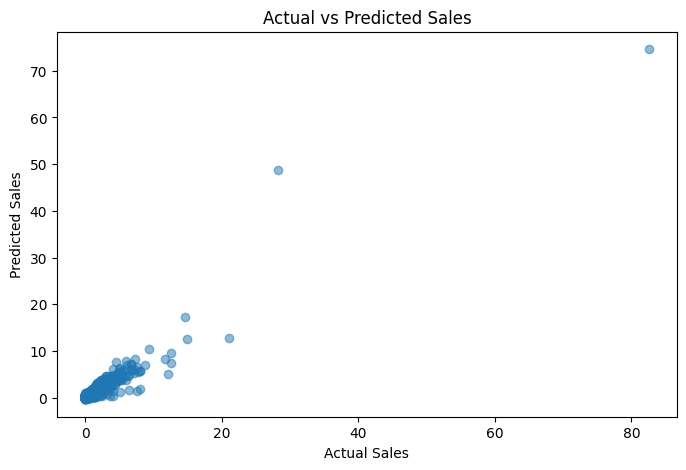

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()